Eigenvectors
============

This week we'll be studying the idea of eigenvectors of a matrix. The physical context will be the oscillation of a pair of masses coupled by springs. See the slides for details! There are two separate implementations here:

1. A VPython version (read the comments and execute the corresponding cells)

2. A numpy/matplotlib version (again, read the comments and execute the appropriate cells)



In [14]:
USE_VISUAL=False

In [15]:
#
# Either use this cell, in which case you will be using VPython 
# Note: VPython only works if you have it installed on your local
# computer. Also, stopping a VPython simulation appears to restart the kernel. Save first!
#
import numpy as np

if USE_VISUAL:    
    import vpython as vp


In [16]:
#
# Or use this one, in which case you will be using pylab
#

if not USE_VISUAL:
    %matplotlib inline
    import matplotlib.pyplot as pl

In [17]:
#
# Basic functions and definitions used by VPython and pylab versions
#

L=10
kb=10.0
ks=1.0
m=1.0
dt=0.03
t=0.0

#
# Note that these displacements do *not* match an eigenvector, so the resulting
# motion (frequency) is a superposition of two eigenvalues (frequencies)
# What happens when you initialize the displacements with an eigenvector?
#

x1i=0.4*L/10  # initial displacement from equil, m1
v1i=0.0   # initial vel, m1
x2i=1*L/10  # initial displacement from equil, m2
v2i=0.0   # initial vel, m2

s=np.array([x1i,v1i,x2i,v2i]) # initial state

def derivs_2m(s, t):
    x1=s[0]   # get the variables from the state
    v1=s[1]
    x2=s[2]
    v2=s[3]
    a1 = (-(kb+ks)*x1 + ks*x2)/m
    a2 = (-(kb+ks)*x2 + ks*x1)/m
    return np.array([v1, a1, v2, a2])
    
def RK4Step(s, dt, t, derivs):
    """
    Take a single RK4 step.
    """
    f1 = derivs(s, t)
    f2 = derivs(s+f1*dt/2.0, t+dt/2.0)
    f3 = derivs(s+f2*dt/2.0, t+dt/2.0)
    f4 = derivs(s+f3*dt, t+dt)
    return s + (f1+2*f2+2*f3+f4)*dt/6.0


In [18]:
#
# VPython: Simulation of 2 coupled masses on springs.
#
if USE_VISUAL:

    vp.canvas()
    
    wallLeft = vp.box(pos=vp.vec(-L,0,0), height=L/2, width=L/2, length=L/10, color=vp.color.green)
    wallRight = vp.box(pos=vp.vec(L,0,0), height=L/2, width=L/2, length=L/10, color=vp.color.green)
    
    m1 = vp.box(pos=vp.vec(-L/3,0,0), height=L/5, width=L/5, length=L/5, color=vp.color.red)
    m2 = vp.box(pos=vp.vec(+L/3,0,0), height=L/5, width=L/5, length=L/5, color=vp.color.red)
    
    vWall=vp.vector(wallLeft.length/2,0,0)  # sorta like axis of wallLeft?
    vMass=vp.vector(m1.length/2,0,0)        # same for the masses
    
    s1 = vp.helix(pos=wallLeft.pos+vWall, axis=(m1.pos-vMass)-(wallLeft.pos+vWall), radius=0.5)
    s2 = vp.helix(pos=m1.pos+vMass, axis=(m2.pos-vMass)-(m1.pos+vMass), radius=0.5)
    s3 = vp.helix(pos=m2.pos+vMass, axis=(wallRight.pos-vWall)-(m2.pos+vMass), radius=0.5)
    
    x10=m1.pos.x  # equilibrium pos of m1
    x20=m2.pos.x  # equilibrium pos of m2

In [19]:
#
# VPython: Simulation of 2 coupled masses on springs.
#
if USE_VISUAL:

    def updateScreen(s):
        x1=s[0]   # get the variables from the state
        v1=s[1]
        x2=s[2]
        v2=s[3]
    
        m1.pos.x = x10+x1  # update mass positions
        m2.pos.x = x20+x2
        
        #
        # now just update spring positions and axes
        #
        
        s1.axis = (m1.pos-vMass)-(wallLeft.pos+vWall)
        s2.pos = m1.pos+vMass
        s2.axis = (m2.pos-vMass)-(m1.pos+vMass)
        s3.pos = m2.pos+vMass
        s3.axis = (wallRight.pos-vWall)-(m2.pos+vMass)
        
    updateScreen(s)

In [20]:
#
# VPython: Simulation of 2 coupled masses on springs.
#
if USE_VISUAL:

    while True:
        vp.rate(30)
        s = RK4Step(s, dt, t, derivs_2m)
        t += dt
        updateScreen(s)


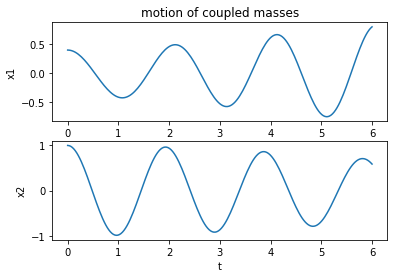

In [21]:
if not USE_VISUAL:
    x1list=[s[0]]
    x2list=[s[2]]
    tlist=[0.0]
    t=0.0
    
    while t<6:
        s = RK4Step(s, dt, t, derivs_2m)
        t += dt
        x1list.append(s[0])
        x2list.append(s[2])
        tlist.append(t)
        
    pl.subplot(211)
    pl.ylabel("x1")
    pl.title("motion of coupled masses")
    pl.plot(tlist,x1list,label="x1")
    pl.subplot(212)
    pl.ylabel("x2")
    pl.xlabel("t")
    pl.plot(tlist,x2list,label="x2")
    


We can also sort out what's happening using the matrix formulation developed in the slides. The eigenvalue problem:

$$\begin{bmatrix} \frac{(k_b+k_s)}{m} & -\frac{k_s}{m} \\ -\frac{k_s}{m} & \frac{(k_b + k_s)}{m} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}  = \frac{k_b}{m} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} $$

Has solutions:

$$\omega^2 = \frac{k_b}{m},\frac{k_b+2k_s}{m}$$

Which corrspond to eigenvectors

$$\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \mathinner|+\rangle =  \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}$$

or 

$$\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \mathinner|-\rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix}$$

The neat thing is that we can use the "eig" function in pylab to automaticaly find the eigenvectors and eigenvalues automatically.

See the cell below for an example!


In [22]:
Mat = np.array([[(kb+ks)/m, -ks/m],
            [-ks/m, (kb+ks)/m]])

vals, vecs = np.linalg.eig(Mat)

print("values:", vals)
print("vec(0):", vecs[:,0])
print("vec(1):", vecs[:,1])

values: [12. 10.]
vec(0): [ 0.70710678 -0.70710678]
vec(1): [0.70710678 0.70710678]


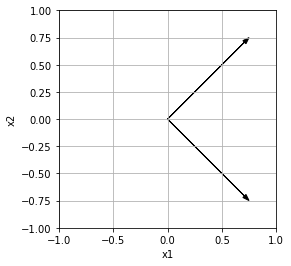

In [23]:
if not USE_VISUAL:
    pl.figure()
    ax = pl.axes()
    ax.set_aspect('equal')
    ax.arrow(0, 0, vecs[0,0], vecs[1,0], head_width=0.04, fc='k', ec='k')
    ax.arrow(0, 0, vecs[0,1], vecs[1,1], head_width=0.04, fc='k', ec='k')
    pl.xlim([-1,1])
    pl.ylim([-1,1])
    pl.xlabel("x1")
    pl.ylabel("x2")
    pl.grid()
    

c1 =  0.9899494936611665
c0 =  -0.42426406871192845


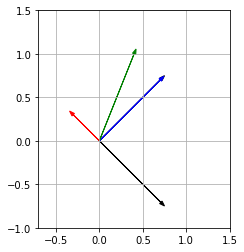

In [24]:
if not USE_VISUAL:
    pl.figure()
    ax = pl.axes()
    ax.set_aspect('equal')
    ax.arrow(0, 0, vecs[0,0], vecs[1,0], head_width=0.04, fc='k', ec='k')
    ax.arrow(0, 0, vecs[0,1], vecs[1,1], head_width=0.04, fc='k', ec='k')
    pl.xlim([-0.7,1.5])
    pl.ylim([-1,1.5])
    pl.grid()
    
    x0 = np.array([.4,1])
    c0 = vecs[:,0].dot(x0)
    c1 = vecs[:,1].dot(x0)
    ax.arrow(0, 0, c0*vecs[0,0], c0*vecs[1,0], head_width=0.04,fc='r', ec='r')
    ax.arrow(0, 0, c1*vecs[0,1], c1*vecs[1,1], head_width=0.04,fc='b', ec='b')
    ax.arrow(0, 0, x0[0], x0[1], head_width=0.04, fc='g', ec='g')
    print("c1 = ", c1)
    print("c0 = ", c0)

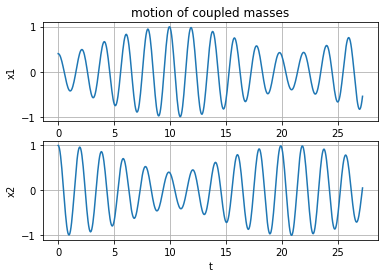

In [25]:
if not USE_VISUAL:
    Tf = 15*2*np.pi/np.sqrt(vals[0]) # take 5 periods of the high freq
    t = np.linspace(0,Tf,500)
    x = c0*np.array([vecs[:,0]]).T*np.cos(np.sqrt(vals[0])*t) + c1*np.array([vecs[:,1]]).T*np.cos(np.sqrt(vals[1])*t)
    pl.subplot(211)
    pl.ylabel("x1")
    pl.title("motion of coupled masses")
    pl.plot(t,x[0,:],label="x1")
    pl.grid()
    pl.subplot(212)
    pl.ylabel("x2")
    pl.xlabel("t")
    pl.plot(t,x[1,:],label="x2")
    pl.grid()
    

Project 10 (option A)
=================

Complete the analyss of three masses connected by springs of equal spring constant.

Find the eigenvalues and eigenvectors for three masses.

Use the RK4 approach as shown above to validate that the eigenvalues you compute are correct.

A => 0.5728008043048707
omega**2 => 9.749896698313547
phi => -0.21094759892722229


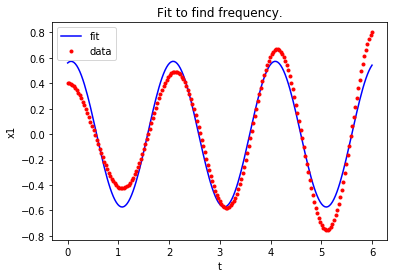

In [26]:
from scipy.optimize import curve_fit

def cosFit(t, A, omega, phi):
    """
    Function def for a cosine fit
    """
    return A*np.cos(omega*t+phi)

x1a=np.array(x1list)
ta=np.array(tlist)
popt, pcov = curve_fit(cosFit, ta, x1a, p0=(0.707, np.sqrt(10.0), 0.0))

A=popt[0]
omega=popt[1]
phi=popt[2]

print("A =>", A)
print("omega**2 =>", omega**2)
print("phi =>", phi)

pl.title('Fit to find frequency.')
pl.xlabel('t')
pl.ylabel('x1')
pl.plot(ta, cosFit(ta, A, omega, phi), 'b-', label="fit")
pl.plot(ta, x1a, 'r.', label='data')
pl.legend()

Project 10 (option B)
=================

Solve any interesting problem (to you!) that involves eigenvalues and eigenvectors. This could be something like [stochastic matrices](P10b-StochasticMatrices.ipynb), or [page rank algorithms](https://en.wikipedia.org/wiki/PageRank), or anything else you like so long as it relates in some way to the concept of eigenvalues and eigenvectors.